In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/sample_data/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
1,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
2,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
3,2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
4,2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100


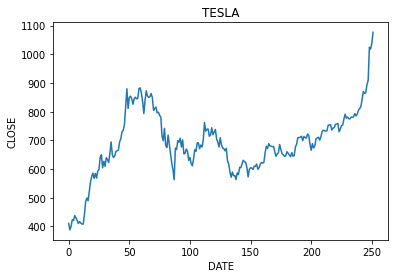

In [3]:
close=data['Close']
ax=close.plot(title="TESLA")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

In [7]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

As we are using Facebook Prophet model, for predicting the stock prices of Tesla, it depends on time series that have strong seasonal effects and several seasons of historical data. Facebook's Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. Insert the code below in a new code cell and run it.



In [8]:
data=data.rename(columns={"Date":"ds","Close":"y"})

Predicting the Test set

In [9]:
model=Prophet.Prophet()
model.fit(data)
predict=model.make_future_dataframe(periods=365)
forcast=model.predict(predict)

forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-10-24,1806.215246,910.644451,2749.891095
613,2022-10-25,1812.153612,924.848255,2757.043361
614,2022-10-26,1813.503560,921.426321,2766.457790
615,2022-10-27,1817.097860,929.495595,2762.664105
616,2022-10-28,1817.903998,911.600274,2770.282403


Visualising the predicted model on Graph

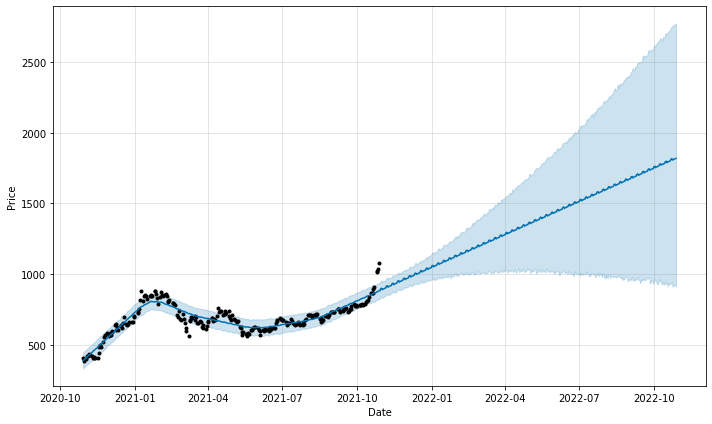

In [10]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

As we observe that the predicted model we can see the trend lines going down the axis. If Tesla doesn't come up with a better plan, the trend line is supposed to remain like this.